In [4]:
import os
import hdf5plugin # if data are too large
from xrayutilities import en2lam

from cdiutils.processing.pipeline import BcdiPipeline
from cdiutils.load.authorized_keys import (
    AUTHORIZED_KEYS, get_parameters_from_notebook_variables
)

### Parameters related to the processing

In [5]:
metadata = {
  'beamline_setup':
  'ID01BLISS',
  'scan': 12,
  'sample_name': 'Pt_0001',
  'experiment_file_path': '/data/visitor/hc4050/id01/20230125/raw/hc4050_id01.h5',
  'detector_data_path': None,
  'edf_file_template': None,
  'detector_name': 'eiger2M',
  'flatfield_path': None,
  'dump_dir': None,
  'reconstruction_file': "mode.h5"
}

metadata["dump_dir"] = (
    '/data/id01/inhouse/clatlan/experiments/'
    f'hc4050_01_23/analysis/results/S{metadata["scan"]}/'
)

preprocessing_output_shape = [150, 150]
energy = 12994
roi = [0, 2164, 0, 1030]
hkl = [1, 1, 1]
det_reference_voxel_method = None
det_reference_voxel = (100, 1235, 364)

det_calib_parameters = {
     'cch1': 1375.3714152892385,
     'cch2': 484.8384115882237,
     'pwidth1': 7.5e-05,
     'pwidth2': 7.5e-05,
     'distance': 1.1326099021792053,
     'tiltazimuth': 284.0343960741484,
     'tilt': 22.20100514732278,
     'detrot': 0.7948717948717947,
     'outerangle_offset': 0.0
}

voxel_size = None
apodize = True
flip = False
isosurface = None

usetex = False
show = True
verbose = True


# PyNX parameters
data = (
  metadata["dump_dir"]
  + f"cdiutils_S{metadata['scan']}_pynx_input_data.npz"
)

mask = (
  metadata["dump_dir"]
  + f"cdiutils_S{metadata['scan']}_pynx_input_mask.npz"
)

data2cxi = True
auto_center_resize = True

support_type = "square"
support_size = (40, 20, 40)
support = "auto"
support_threshold = "0.25, 0.35"
support_threshold_method = "rms"
support_only_shrink = False
support_update_period = 20
support_smooth_width_begin = 2
support_smooth_width_end = 1
support_post_expand = "1,-2,1"
psf = "pseudo-voigt,0.5,0.1,10"

nb_raar = 1000
nb_hio = 100
nb_er = 120
nb_ml = 10
nb_run = 20
nb_run_keep = 10

zero_mask = False
crop_output = 0
positivity = False
beta = 0.9
detwin = False

rebin = "1,1,1"
detector_distance = 1.1326099021792053,
pixel_size_detector = 75e-6
wavelength = en2lam(energy) * 1e-10 # wavelength in meter

verbose = 100
output_format = "cxi"
live_plot = False
save_plot = True
mpi = "run"

parameters = get_parameters_from_notebook_variables(dir(), globals())

In [7]:
bcdi_pipeline = BcdiPipeline(parameters=parameters)


********************************************************************************
*   [INFO] Proceeding to preprocessing using the cdiutils backend (scan 12)    *
********************************************************************************

The preprocessing output shape is: (201, 150, 150)
Reference voxel provided by user: (100, 1235, 364)
[INFO]

Max in the full detector frame at (190, 917, 430)
Max in the cropped
detector frame at (190, -243, 141)
The max corresponds to a d-spacing of 2.1577
A and a lattice parameter of 3.7372 A

Com in the full detector frame at
(189.72, 917.89, 431.4) (based on a (150, 150) max-centered bounding box)
Com in
the cropped detector frame at (189.72, -242.11, 142.4)
The com corresponds to a
d-spacing of 2.1580 A and a lattice parameter of 3.7378 A

The reference
q_lab_reference corresponds to a d-spacing of 2.2621 A and a lattice parameter
of 3.9180 A

[INFO] Dump directory already exists, results will be saved in:
/data/id01/inhouse/clatlan/experi

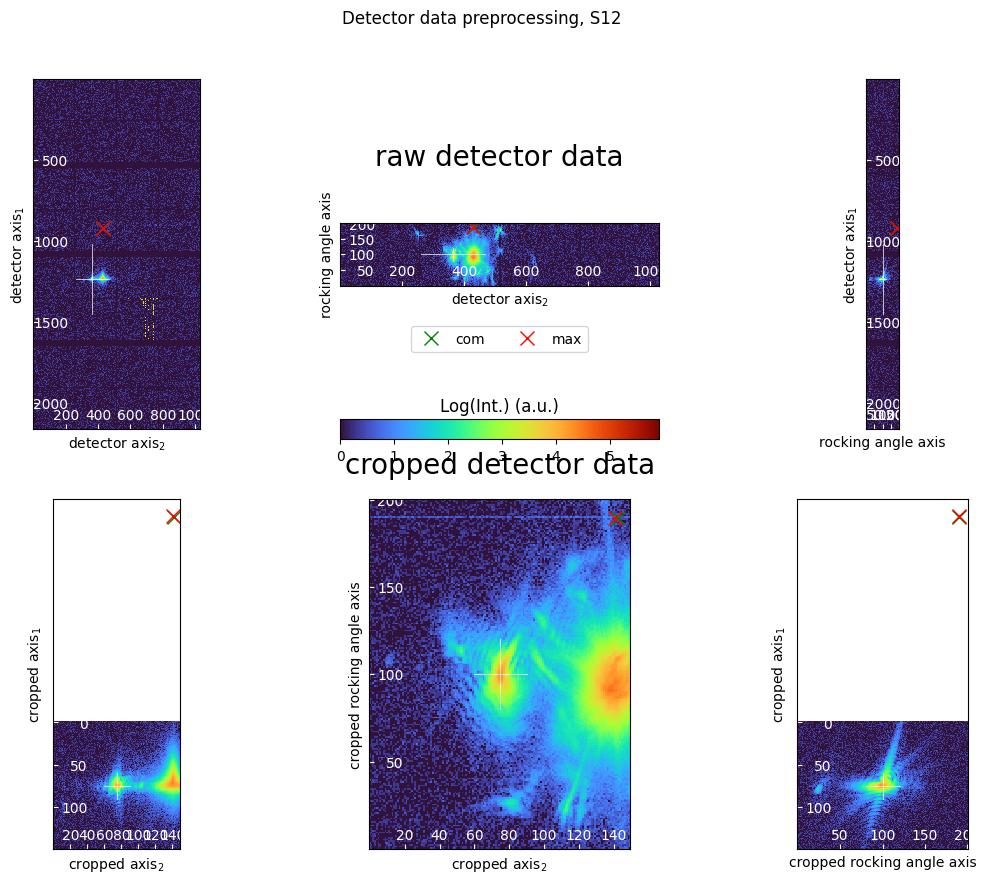

In [8]:
bcdi_pipeline.preprocess()

In [11]:
user = os.environ["USER"]
key_file_path = os.environ["HOME"] + "/.ssh/id_rsa"

print(
    f"Will use the user name '{user}' "
    f"and the private key file path: '{key_file_path}'"
)

bcdi_pipeline.phase_retrieval(
    machine="slurm-nice-devel",
    user=user,
    key_file_path=key_file_path,
    remove_last_results=True
)

Will use the user name 'chatelie' and the private key file path: '/home/chatelie/.ssh/id_rsa'

********************************************************************************
*              [INFO] Proceeding to PyNX phase retrieval (scan 2)              *
********************************************************************************

[INFO] Removing former results

Pynx slurm file template not provided, will take the default: /home/chatelie/Documents/PostDocCEA/.env/cdiutils/lib/python3.9/site-packages/cdiutils/processing/pynx-id01cdi_template.slurm
[INFO] Connected to slurm-nice-devel
Submitted batch job 5226390

[INFO] process status: ----------
[INFO] process status: PENDING
[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status: RUNNING

[INFO] process status:

In [12]:
bcdi_pipeline.find_best_candidates(nb_to_keep=5)



********************************************************************************
*         [INFO] Finding the best candidates of the PyNX run. (scan 2)         *
********************************************************************************


[INFO] Candidates with the lowest std will be saved.

[INFO] Opening file: cdiutils_S2_pynx_input_data-2023-01-24T21-10-32_Run0019_LLKf003.1328_LLK006.4366_SupportThreshold0.32137.cxi
[INFO] Opening file: /data/id01/inhouse/corentin/experiments/202301_Pt_HighSpeedBCDI/cdiutils_analysis/results/S2/cdiutils_S2_pynx_input_data-2023-01-24T21-10-32_Run0019_LLKf003.1328_LLK006.4366_SupportThreshold0.32137.cxi
[INFO] Opening file: cdiutils_S2_pynx_input_data-2023-01-24T21-10-03_Run0001_LLKf002.7238_LLK007.0446_SupportThreshold0.31955.cxi
[INFO] Opening file: /data/id01/inhouse/corentin/experiments/202301_Pt_HighSpeedBCDI/cdiutils_analysis/results/S2/cdiutils_S2_pynx_input_data-2023-01-24T21-10-03_Run0001_LLKf002.7238_LLK007.0446_SupportThreshold0.3195

In [13]:
bcdi_pipeline.mode_decomposition()


********************************************************************************
*   [INFO] Running mode decomposition from /sware pynx installation (scan 2)   *
********************************************************************************

[STDOUT FROM SUBPROCESS]
 0  /sware/exp/pynx/activate_pynx.sh  
Activated pynx (version=release) on Ubuntu-20.04-x86_64: /sware/exp/pynx/release/Ubuntu-20.04-x86_64
Importing data files
Loading 5 files in // [8 proc]
    Loading: candidate_1-5_cdiutils_run_07_STD88.249603__LLKF2.414146_LLK4.637812.cxi
    Loading: candidate_2-5_cdiutils_run_03_STD88.888710__LLKF2.377436_LLK4.442450.cxi
    Loading: candidate_3-5_cdiutils_run_13_STD90.683395__LLKF2.533651_LLK6.192434.cxi
    Loading: candidate_4-5_cdiutils_run_19_STD91.083199__LLKF3.132826_LLK6.436618.cxi
    Loading: candidate_5-5_cdiutils_run_17_STD92.470451__LLKF2.589977_LLK4.843550.cxi
Calculating modes from the imported objects
Matching arrays against the first one [candidate_2-5_cdiutils_ru

[INFO] The shape of the reconstructed object is: (200, 144, 150)
The shape for a
safe centered cropping is: (90, 144, 150)
[INFO] Voxel size in the direct lab frame provided by user: None nm
[INFO] the extent in the target space of a regular grid defined in the original space with a shape of (90, 144, 150) is (120, 150, 144)
[INFO] Voxel size in the direct lab space due to the orthognolization process [13.79059204  8.54582334  9.57062518]
[INFO] the extent in the target space of a regular grid defined in the original space with a shape of (90, 144, 150) is (90, 153, 165)
[INFO] Voxel size finally used is: [13.79059204  9.57062518  8.54582334] nm in
the CXI convention
[PROCESSING] Apodizing the complex array:done.
[PROCESSING] Finding an isosurface estimate based on the reconstructed Bragg
electron density histogram:done.
[INFO] isosurface estimated to be 0.9197519476634648
[INFO] The theoretical probed Bragg peak reflection is [1, 1, 1]
[PROCESSING] finding a new array shape
[INFO] new

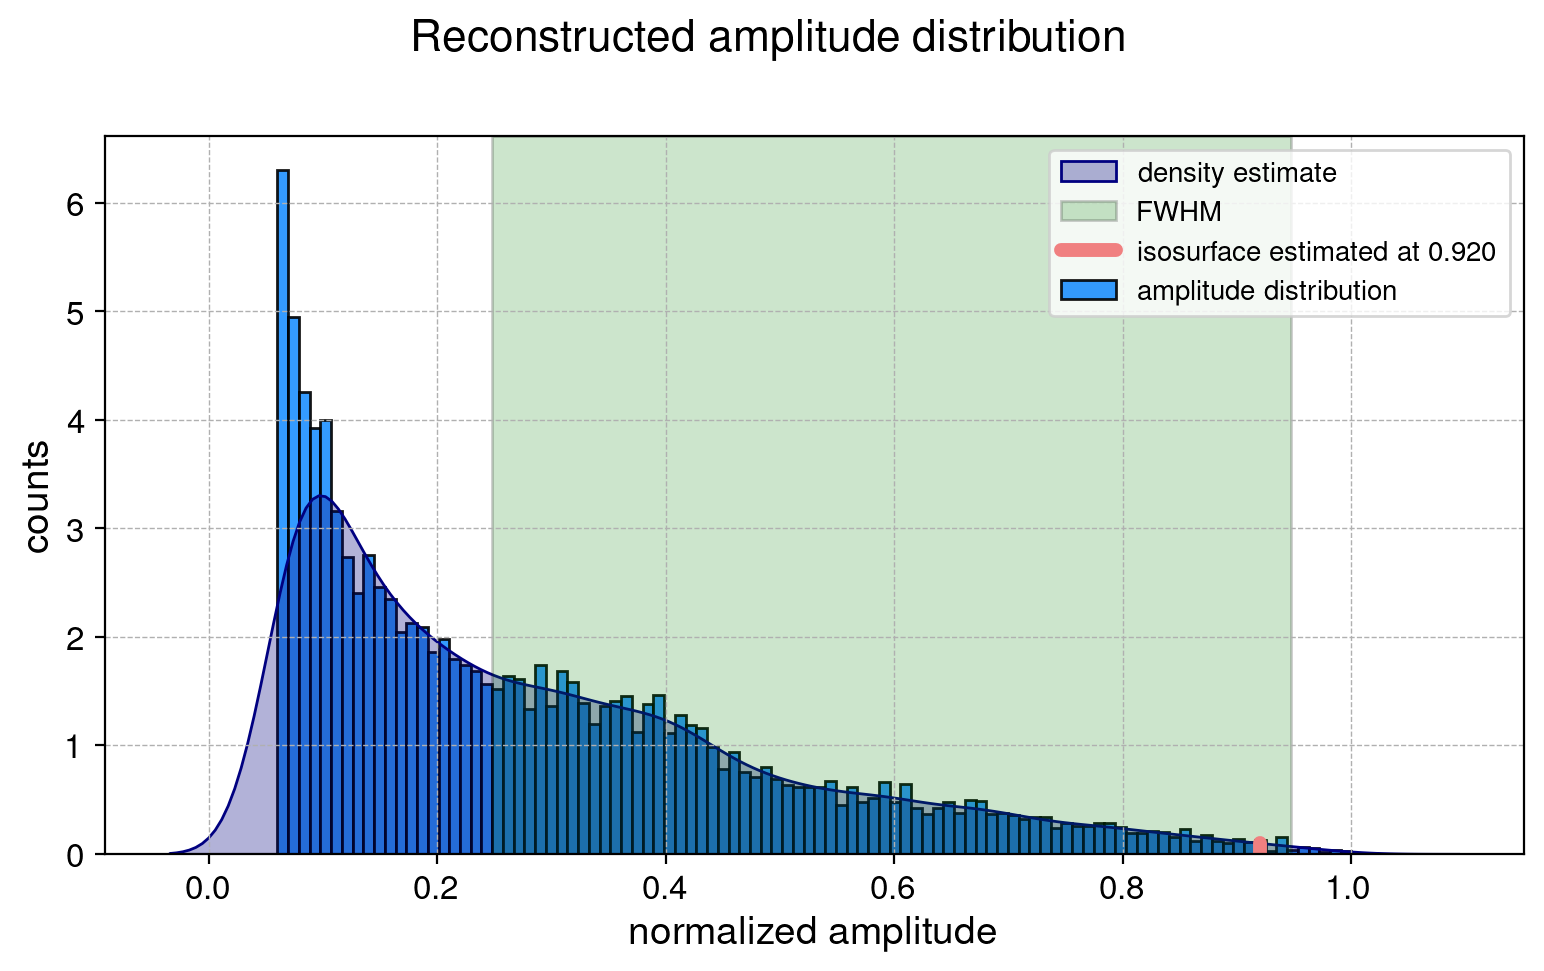

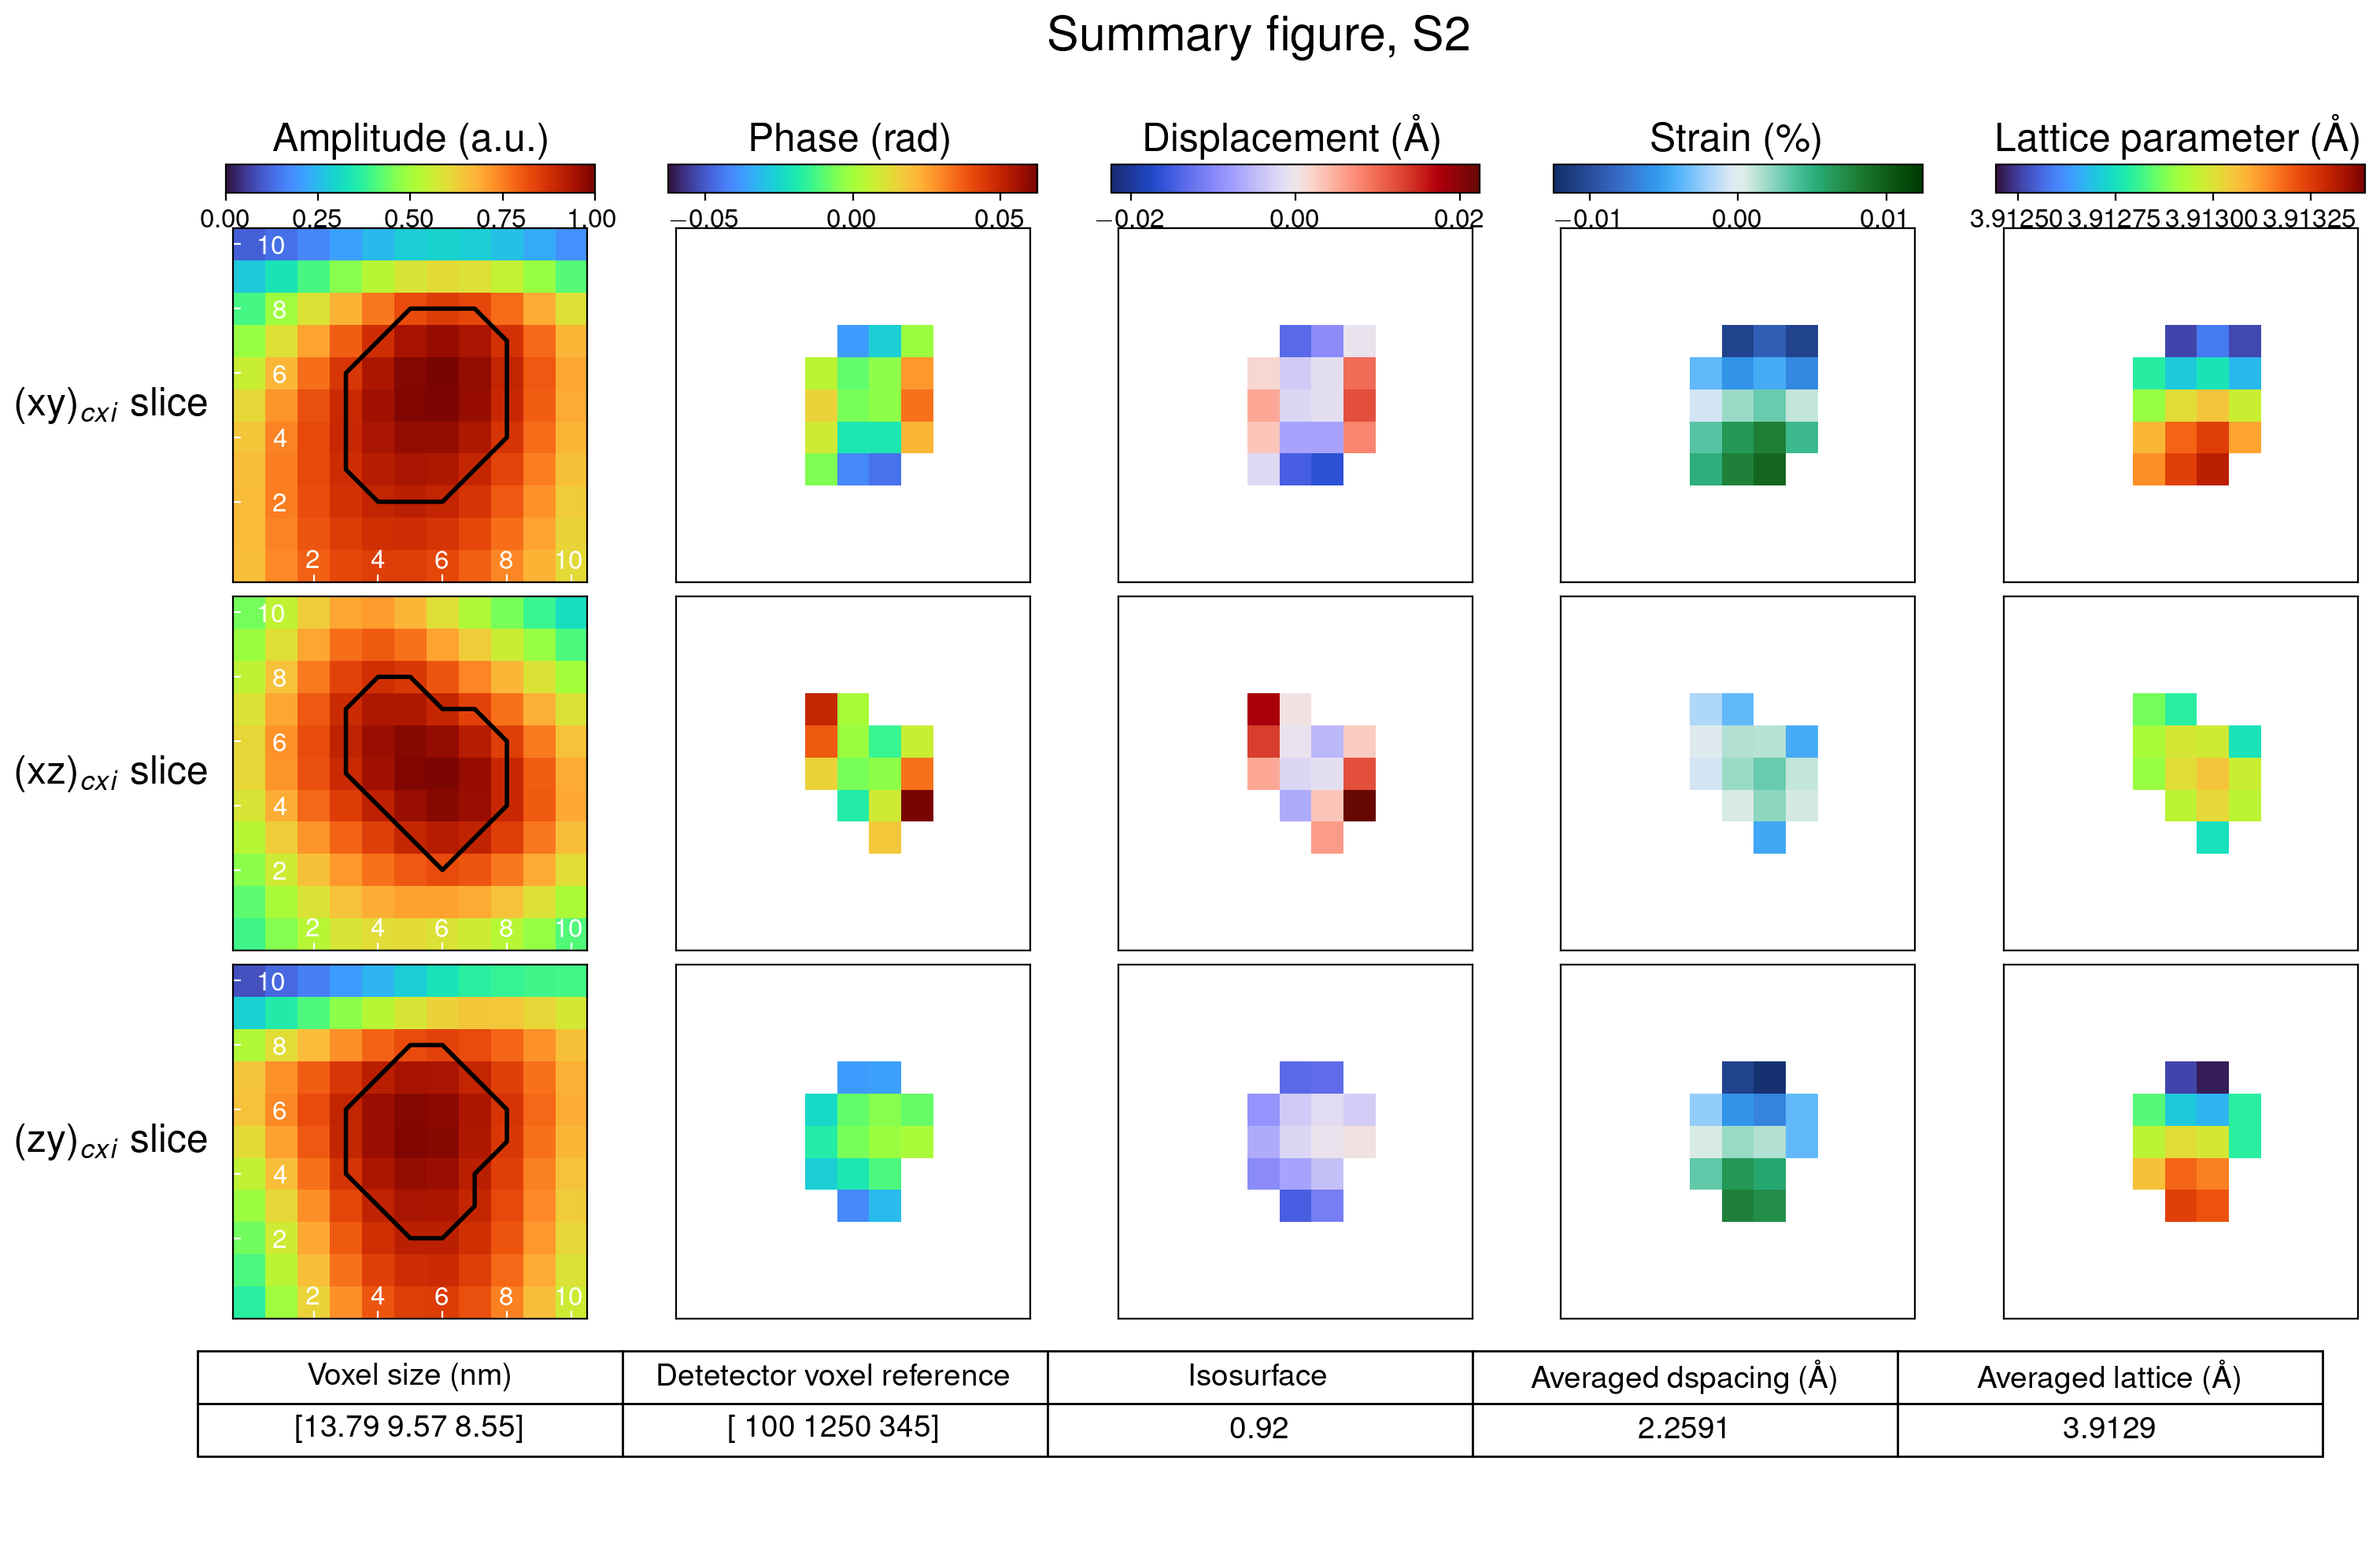

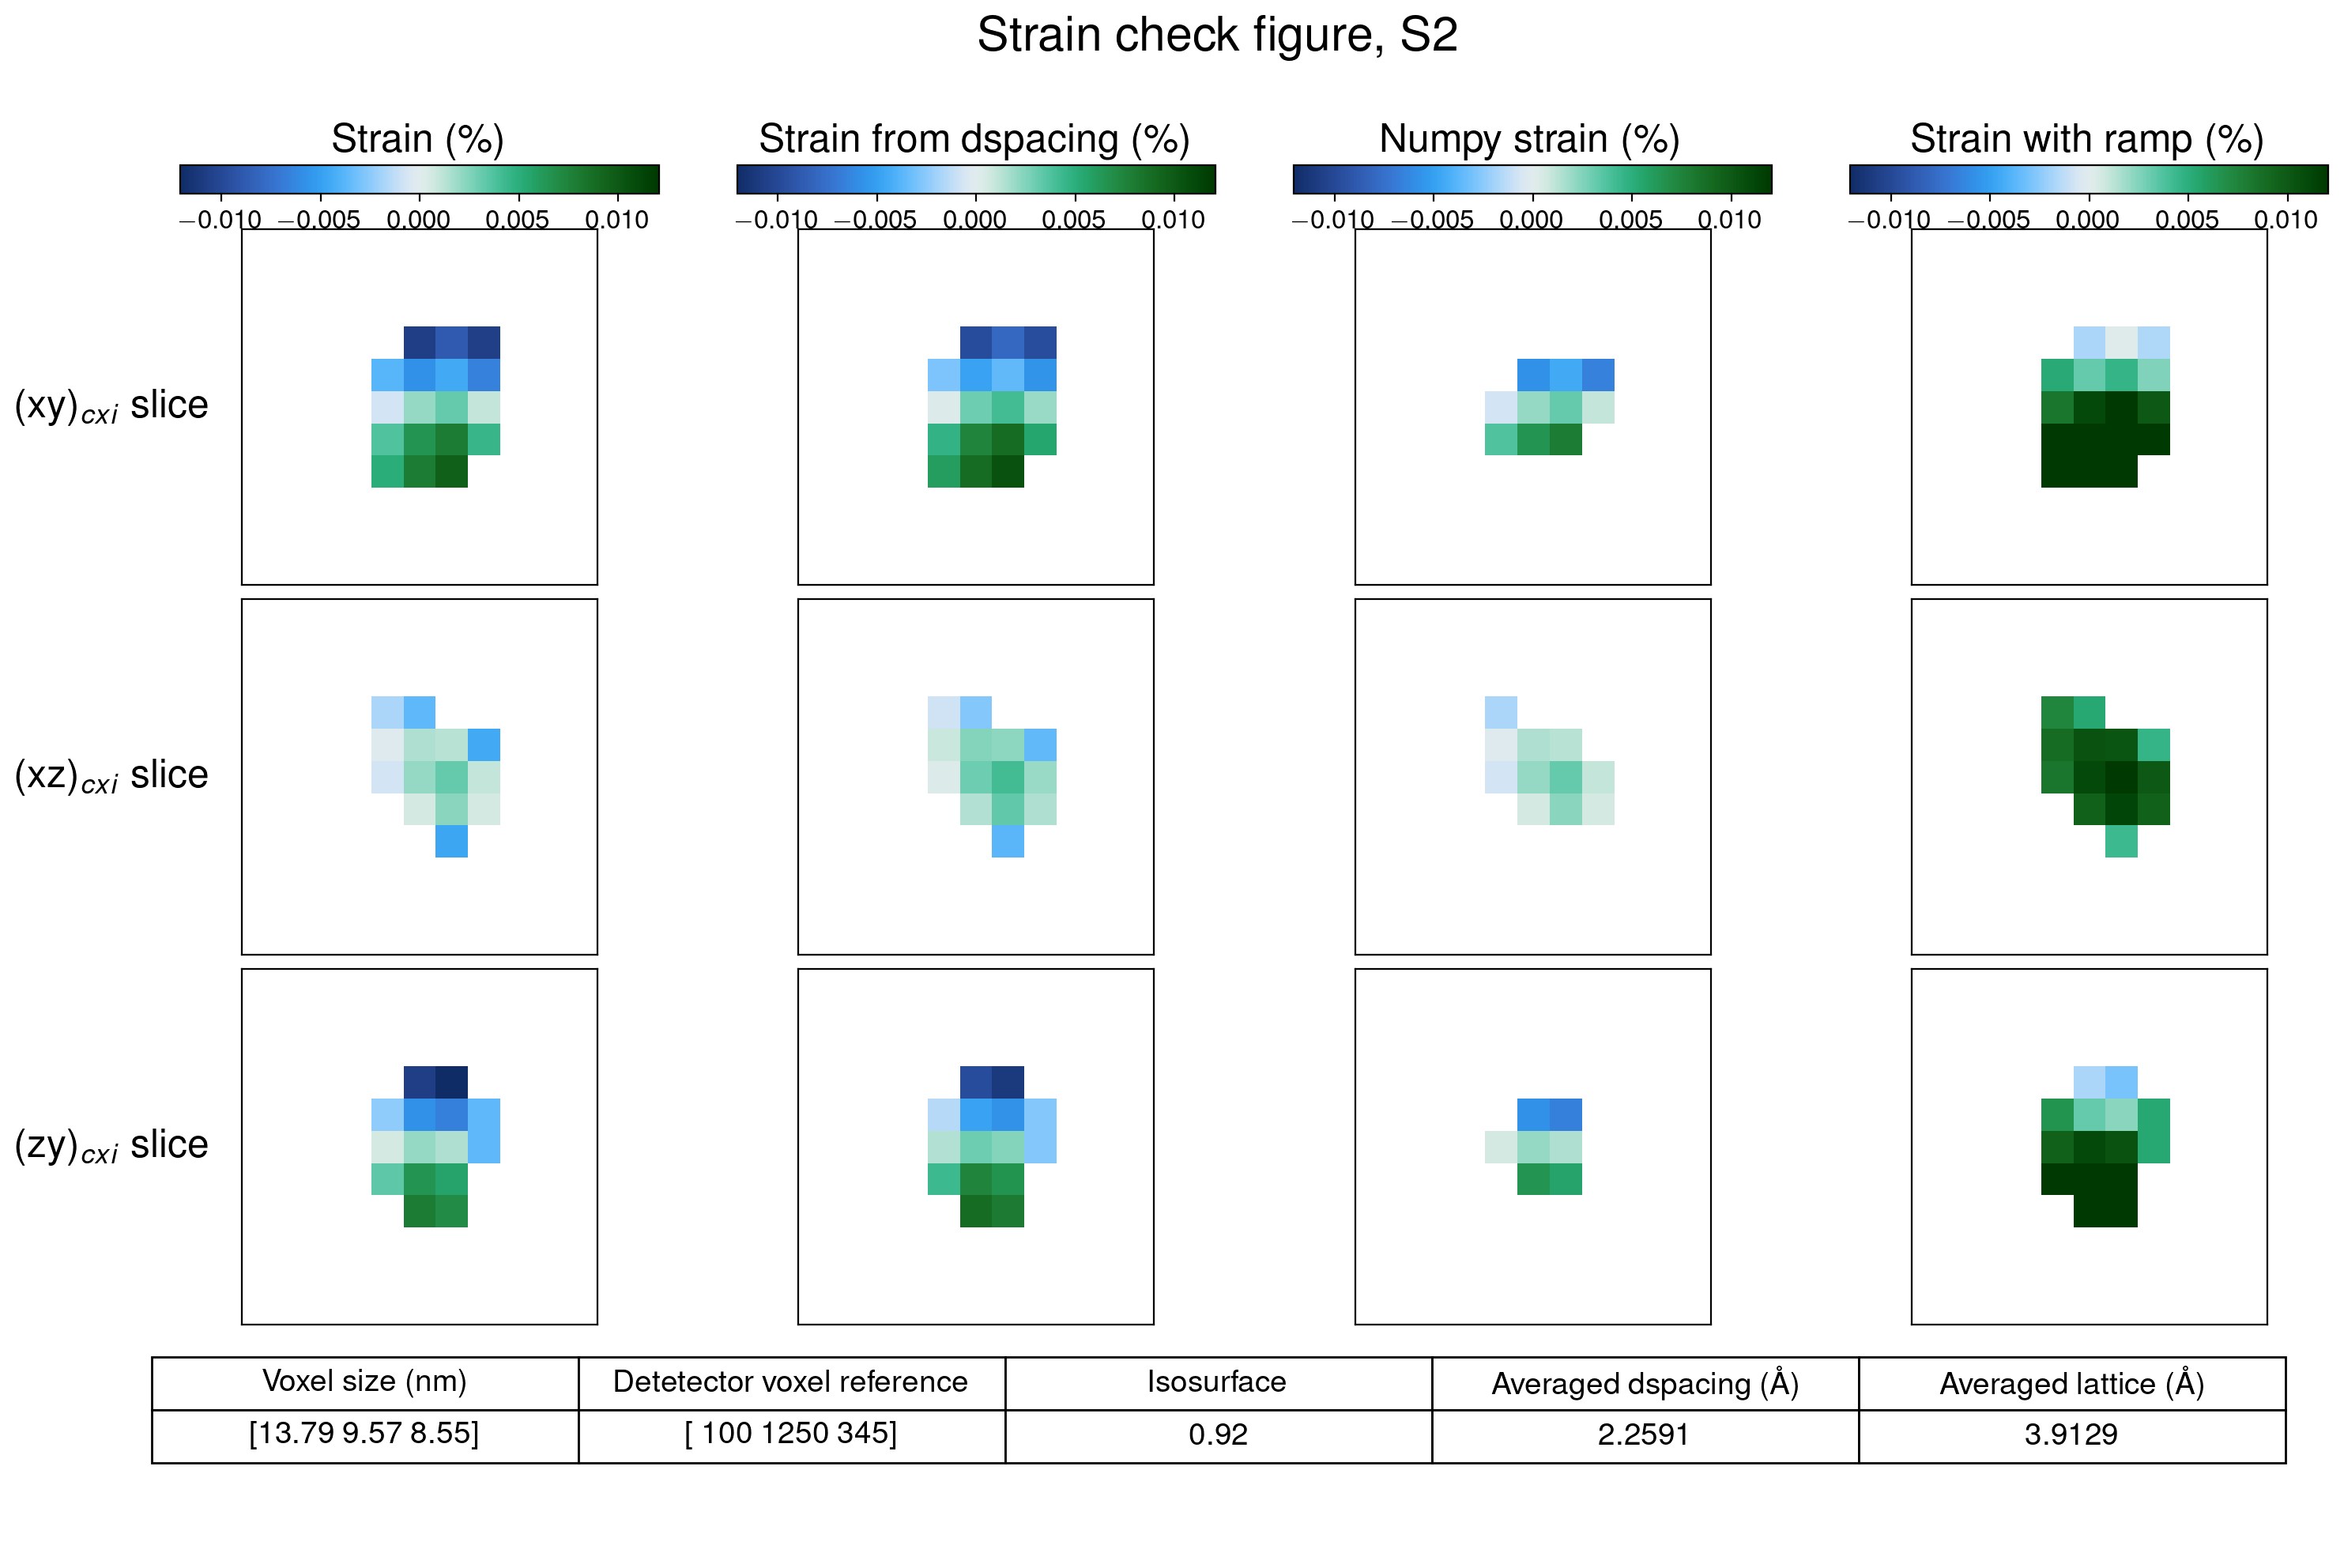


********************************************************************************
*Saving scan parameter file at the following location: /data/id01/inhouse/corenti
n/experiments/202301_Pt_HighSpeedBCDI/cdiutils_analysis/results/S2/*
********************************************************************************



In [14]:
bcdi_pipeline.postprocess()
bcdi_pipeline.save_parameter_file()